### MATH2504 S2, 2022, BigHW Submission 
### Submission form IV of IV 

Student #1 name: Isaac Beh

Student #1 ID: 45919260

Student #2 name: Leanna Salve

Student #2 ID: 47038156

GitHub repo: [Isaac-Beh__Leanna-Salve-2504-2022-BigHW](https://github.com/49Indium/Isaac-Beh__Leanna-Salve-2504-2022-BigHW)

---

# Solution to [Question 13](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q13)

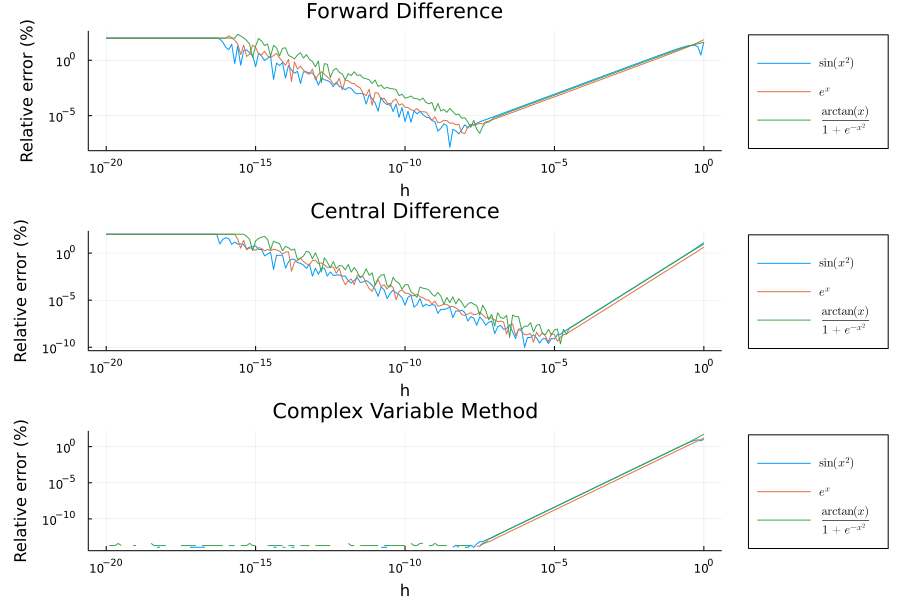

In [13]:
using Plots

# For nice looking legends
using LaTeXStrings

function my_appox_derivative(f, x, h; method::String)
    if lowercase(method) == "forward difference"
        return (f(x+h) - f(x))/h
    elseif lowercase(method) == "central difference"
        return (f(x + h/2) - f(x - h/2))/h
    elseif lowercase(method) == "complex variable method"
        return imag(f(x + h*im)/h)
    end
    throw(error("Unknown method: " * method))
end

function relative_error(experimental_value, actual_value)
    error = abs((experimental_value - actual_value) / actual_value) * 100
    return isfinite(log(error)) ? error : missing
end

f_1(x) = sin(x^2)
f_2(x) = exp(x)
f_3(x) = atan(x) / (1 + exp(-x^2))

f = [f_1, f_2, f_3]
sub_value = [1/2, 1, 2]

actual_value = [x->cos(x^2) * 2x, x->exp(x), x->(exp(x^2) * (2(x^3 + x) * atan(x) + exp(x^2) + 1))/((exp(x^2) + 1)^2 * (x^2 + 1))]

hs = 10 .^ (0:-0.1:-20)

plots = Any[]

for method in ["Forward Difference", "Central Difference", "Complex Variable Method"]
    errors = Any[]
    for i in 1:3
        push!(errors, relative_error.(my_appox_derivative.(f[i], sub_value[i], hs, method=method), actual_value[i](sub_value[i])))
    end
    push!(plots, plot(hs, errors, xscale = :log10, yscale = :log10, xlabel="h", ylabel="Relative error (%)", label = [L"\sin(x^2)" L"e^x" L"\frac{\arctan(x)}{1+e^{-x^2}}"], legend = :outertopright, title = method))
end

# For left_margin size
using Plots.PlotMeasures

plot(plots..., layout = (3, 1), size=(900,600), left_margin = 20px)

The plots above show the relative error for each method. We can then see that the optimal `h` for the forward difference method is around $5\times10^{-7}$, the optimal `h` for the central difference method is about $10^{-5}$, and the optimal `h` for the central difference method is about $5\times10^{-7}$ but smaller values do not increase relative error.

# Solution to [Question 14](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q14)

In [14]:
# Code given in question sheet

using LinearAlgebra

function structured_P(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Matrix{Float64}
    q = 1 - p - r
    P = diagm(fill(r,L)) + diagm(-1=>fill(q,L-1)) + diagm(1 => fill(p,L-1))
    P[1,1] = 1-p
    P[L,L] = 1-q
    return P
end

structured_π(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64} = begin
    q = 1 - p - r
    [(p/q)^i  for i in 1:L] * (q-p) / p / (1-(p/q)^L) #Explicit expression (birth death)
end;

Note that two different implementations of the forth method are implemented below (namely `π_random` and `π_random_trialled`). The difference is that `π_random` only does one trial, whereas `π_random_trialled` takes the average of multiple trials.

In [15]:
function π_linear_equations(P)
    # Note 0 = π(I-P)
    n = size(P, 1)
    return vec(hcat(zeros(n)', 1) / hcat((I-P), ones(n)))
end

function π_limit(P; error = 10^-6, max = 10^4)
    P_prev = 0*P
    N = 1
    while any(abs.(P - P_prev) .> error) && N < max
        P_prev = P
        P *= P
        N += 1
    end
    return P[1, :]
end

function π_eigen_vector(P)
    eigen_values, eigen_vectors = eigen(P')
    unscaled_π = eigen_vectors[:, eigen_values .≈ 1]'
    return vec(unscaled_π ./ sum(unscaled_π))
end

using StatsBase

function π_random(P; error = 10^-6, max = 10^4)
    n = size(P, 1)
    position = 1
    total = zeros(n)
    total_prev = ones(n)
    
    N = 1
    while any(abs.(total./N - total_prev./(N-1)) .> error) && N < max
        total_prev = copy(total)
        position = wsample(1:n, P[position, :])
        N += 1
        
        total[position] += 1
    end
    
    return total ./ N
end

function π_random_trialled(P; error = 10^-6, max = 10^3, trials = 10^2)
    n = size(P, 1)
    stationary = zeros(n)
    
    for trial in 1:trials
        position = rand(1:n)
        total = zeros(n)
        total_prev = ones(n)

        N = 1
        while any(abs.(total./N - total_prev./(N-1)) .> error) && N < max
            total_prev = copy(total)
            position = wsample(1:n, P[position, :])
            N += 1

            total[position] += 1
        end
        
        stationary .+= total./N
    end
    
    return stationary ./ trials
end

@show structured_π(5)
@show π_linear_equations(structured_P(5))
@show π_limit(structured_P(5))
@show π_eigen_vector(structured_P(5))
@show π_random(structured_P(5))
@show π_random_trialled(structured_P(5));

structured_π(5) = [0.2786497527413459, 0.2322081272844549, 0.1935067727370457, 0.16125564394753808, 0.13437970328961507]
π_linear_equations(structured_P(5)) = [0.2786497527413455, 0.23220812728445478, 0.19350677273704606, 0.1612556439475384, 0.1343797032896154]
π_limit(structured_P(5)) = [0.27864975274177767, 0.23220812728465606, 0.1935067727369973, 0.16125564394728384, 0.1343797032892919]
π_eigen_vector(structured_P(5)) = [0.278649752741346, 0.2322081272844547, 0.19350677273704578, 0.16125564394753816, 0.13437970328961515]
π_random(structured_P(5)) = [0.2774, 0.2305, 0.1941, 0.1639, 0.134]
π_random_trialled(structured_P(5)) = [0.27746000000000004, 0.23166, 0.19260000000000002, 0.16119999999999998, 0.13607999999999998]


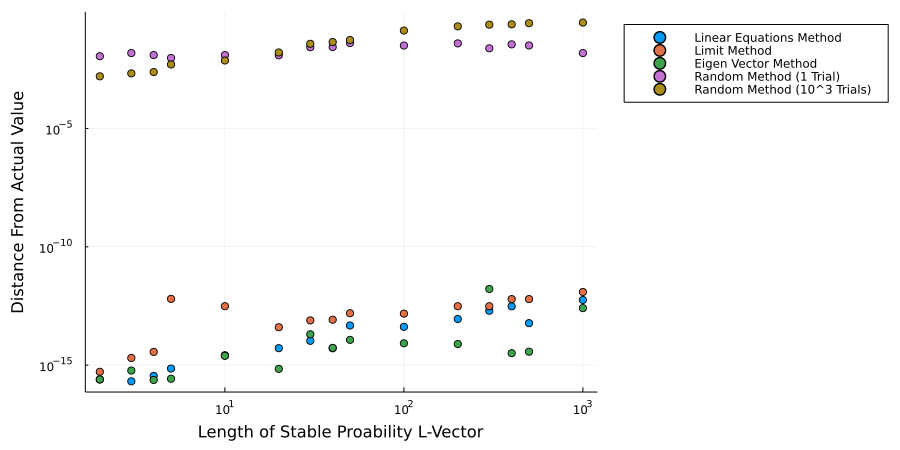

In [16]:
L_values = [2,3,4,5,10,20,30,40,50,100,200,300,400,500,1000]
methods = [π_linear_equations, π_limit, π_eigen_vector, π_random, π_random_trialled]

distances = Array{Float64}(undef, (length(L_values), 5))

for (i, L) in enumerate(L_values)
    P = structured_P(L)
    actual_π = structured_π.(L)
    
    for (j, method) in enumerate(methods)
        distances[i, j] = norm(actual_π - method(P))
    end
end

using Plots
# For sizes of margins
using Plots.PlotMeasures

plot(L_values, distances,
    linetype=:scatter,
    xlabel = "Length of Stable Proability L-Vector",
    ylabel = "Distance From Actual Value",
    xscale = :log10,
    yscale = :log10,
    label=["Linear Equations Method" "Limit Method" "Eigen Vector Method" "Random Method (1 Trial)" "Random Method (10^3 Trials)"],
    legend = :outertopright,
    left_margin = 20px,
    bottom_margin = 20px,
    size = (900, 450))

# Solution to [Question 15](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q15)

#### 15a:

In [17]:
#These four convenience functions extract the state variable from the state vector
#It is assumed the layout of the vector u is u = [v_x, v_y, x, y]
state_v_x(u::Vector{Float64}) = u[1]
state_v_y(u::Vector{Float64}) = u[2]
state_x(u::Vector{Float64}) = u[3]
state_y(u::Vector{Float64}) = u[4]

"""
Computes the RHS for the one body problem. 
"""
function df_dt_one_body(u::Vector{Float64}, t::Float64)::Vector{Float64}
    M, G = 1, 1 #We take these constants as normalized. Naturally they would need to be set for physical values.
    r = sqrt(state_x(u)^2 + state_y(u)^2)
    return [-M*G*state_x(u)/r^3, -M*G*state_y(u)/r^3, state_v_x(u), state_v_y(u)]
end;

In [18]:
using Plots, Measures

function plot_solution( t::AbstractArray{T}, 
                        u::Vector{Vector{Float64}}; 
                        title::String = "",
                        label::Union{String, Bool} = false) where T
    x, y, v_x, v_y = state_x.(u), state_y.(u), state_v_x.(u), state_v_y.(u)
 
    #"Energy"
    r = @. sqrt(x^2 + y^2)
    E = @. 0.5*(v_x^2 + v_y^2) - 1.0/r

    p1 = plot(  x, y, label = label, xlabel= "X", ylabel = "Y",
                title = title*" (position)", aspectratio=1,legend=:topleft,ylim=(-7,7))
    scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")
    scatter!([x[1]], [y[1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")

    p4 = plot(  t, E, xlabel = "Time", ylabel = "Energy",
                label = label, title = title*" (energy)")
    return p1, p4
end;

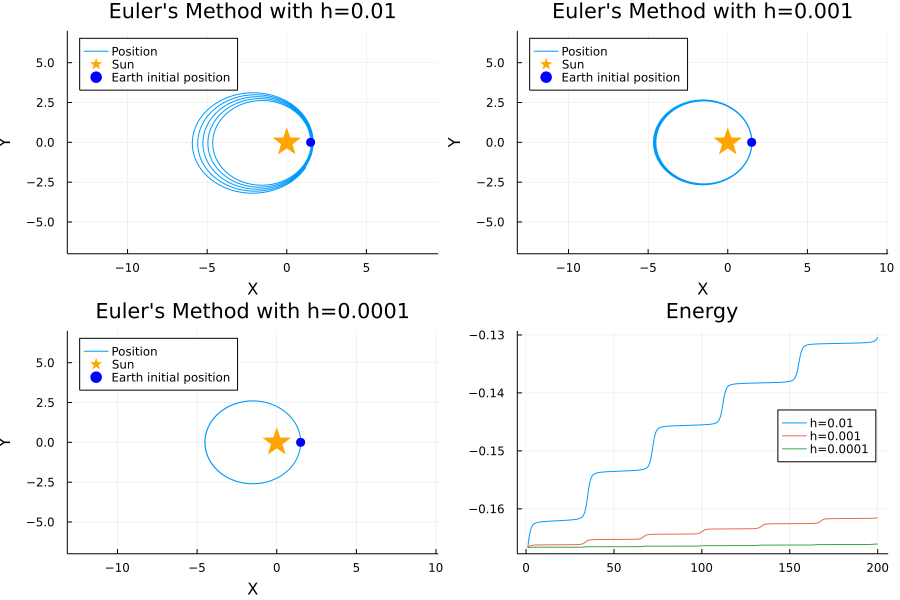

In [19]:
function eulers_method(rhs, t, initial::Vector{Float64})
    # Storage of state (position, velocity, etc...)
    # rows are each component of state space, colums go over time.
    state = Array{Float64}(undef, length(initial), length(t))
    state[:, 1] .= initial
    
    for (i, time) in enumerate(t[1:end-1])
        time_step = t[i+1] - time
        state[:, i+1] = state[:, i] + time_step*rhs(state[:, i], time)
    end
    
    return state, t
end

# Plotting stuff
function plot_sun_moon_system(solve_method, hs, max_time, initial_conditions, title)
    number_of_plot_points = 10000

    plots = Any[]
    times = Any[]
    energies = Any[]

    for h in hs
        state, time = solve_method(df_dt_one_body, 1:h:max_time, initial_conditions)

        push!(times, time)

        # plot only a subset of points for efficiency
        plot_indexes = floor.(Int, range(1, length(time), length = number_of_plot_points))

        p = plot(state[3, plot_indexes], state[4, plot_indexes], label = "Position", xlabel= "X", ylabel = "Y",
                title = title*" with h=$(h)", aspectratio=1, legend=:topleft, ylim=(-7,7))
        scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")
        scatter!([state[3, 1]], [state[4, 1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")
        push!(plots, p)

        r = sqrt.(state[3, :].^2 + state[4, :].^2)
        push!(energies, 0.5*(state[1, :].^2 + state[2, :].^2) - 1.0./r)
    end

    energy_plot = plot()

    for i in 1:3
        # plot only a subset of points for efficiency
        plot_indexes = floor.(Int, range(1, length(times[i]), length = number_of_plot_points))
        plot!(times[i][plot_indexes], energies[i][plot_indexes], title = "Energy", label = "h=$(hs[i])", legend = :right)
    end

    plot(plots..., energy_plot, layout = (2, 2), size=(900,600))
end

plot_sun_moon_system(eulers_method, [0.01, 0.001, 0.0001], 200, [0, 1, 1.5, 0], "Euler's Method")

#### 15b:

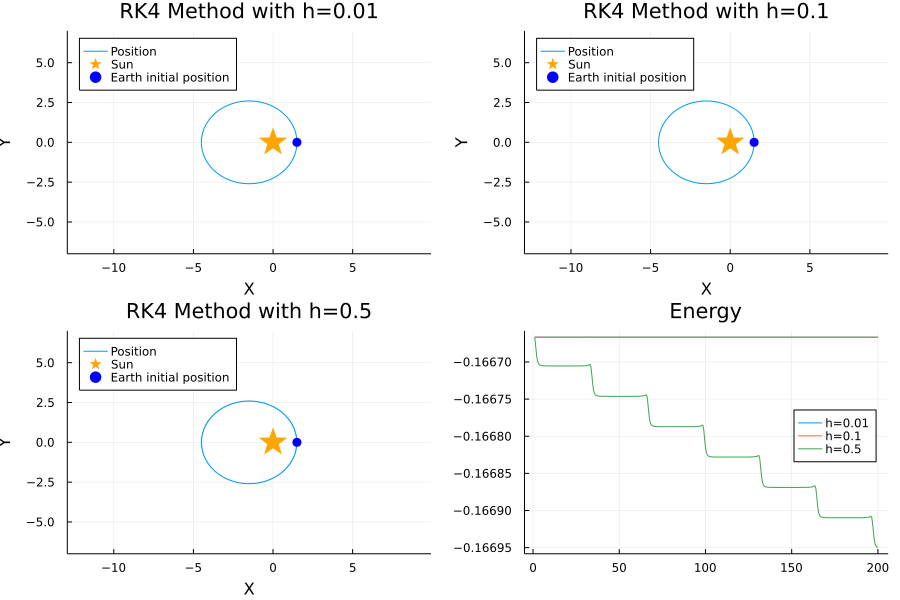

In [20]:
function ODE_solve_RK4(rhs, t, initial::Vector{Float64})
    # Storage of state (position, velocity, etc...)
    # rows are each component of state space, colums go over time.
    state = Array{Float64}(undef, length(initial), length(t))
    state[:, 1] .= initial
    
    for (i, time) in enumerate(t[1:end-1])
        # This is sometimes known as h
        time_step = t[i+1] - time
        
        k1 = rhs(state[:, i], time)
        k2 = rhs(state[:, i] + time_step * (k1/2), time)
        k3 = rhs(state[:, i] + time_step * (k2/2), time)
        k4 = rhs(state[:, i] + time_step * k3, time)
        
        state[:, i+1] = state[:, i] + (time_step/6) * (k1 + 2*k2 + 2*k3 + k4)
    end
    
    return state, t
end

plot_sun_moon_system(ODE_solve_RK4, [0.01, 0.1, 0.5], 200, [0, 1, 1.5, 0], "RK4 Method")

#### 15c:

Timing testing
Euler's method with h=0.01:   6.569 ms (99508 allocations: 9.72 MiB)
RK4 method with h=0.01:   29.764 ms (437808 allocations: 40.69 MiB)
Euler's method with h=0.1:   526.000 μs (9958 allocations: 995.41 KiB)
RK4 method with h=0.1:   2.792 ms (43788 allocations: 4.07 MiB)
Euler's method with h=0.5:   74.700 μs (1997 allocations: 199.48 KiB)
RK4 method with h=0.5:   488.100 μs (8763 allocations: 833.80 KiB)

Accuracy Testing
Euler's method with h=0.0001: 0.0005944679665154107
RK4 method with h=0.0001: 1.7541523789077473e-14
Euler's method with h=0.001: 0.0051329730113938155
RK4 method with h=0.001: 2.275957200481571e-15
Euler's method with h=0.01: 0.036280692783263846
RK4 method with h=0.01: 3.387123914677659e-12
Euler's method with h=0.1: 0.12014376802641391
RK4 method with h=0.1: 1.1185970205662699e-7
Euler's method with h=0.5: 0.1780999427560845
RK4 method with h=0.5: 0.00028313473450691795


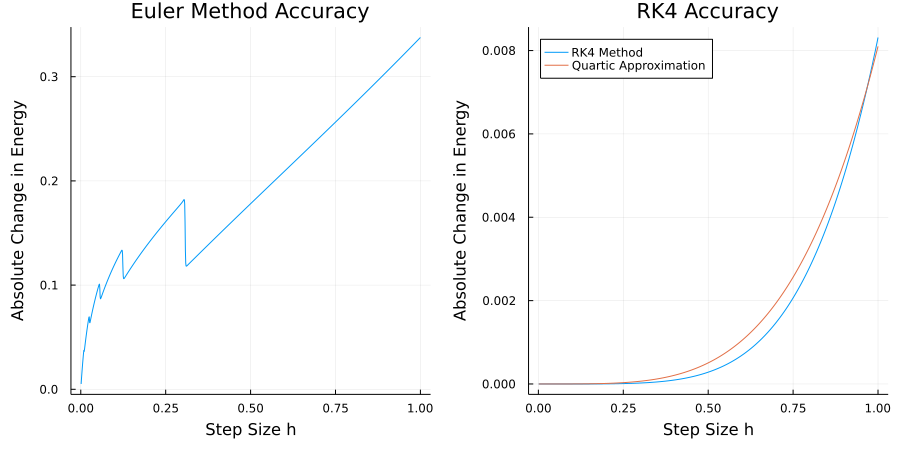

In [21]:
using BenchmarkTools

# For sizes of margins
using Plots.PlotMeasures

function energy_difference(state)
    r = sqrt.(state[3, [1, end]].^2 + state[4, [1, end]].^2)
    energy = 0.5*(state[1, [1, end]].^2 + state[2, [1, end]].^2) - 1.0./r
    return abs(energy[2] - energy[1])
end
 
println("Timing testing")
for h in [0.01, 0.1, 0.5]
    print("Euler's method with h=$(h): ")
    @btime eulers_method($df_dt_one_body, 1:$h:200, [0, 1, 1.5, 0])
    print("RK4 method with h=$(h): ")
    @btime ODE_solve_RK4($df_dt_one_body, 1:$h:200, [0, 1, 1.5, 0])
end

println("\nAccuracy Testing")

for h in [0.0001, 0.001, 0.01, 0.1, 0.5]
    print("Euler's method with h=$(h): ")
    state, _ = eulers_method(df_dt_one_body, 1:h:200, [0, 1, 1.5, 0])
    println("$(energy_difference(state))")
    print("RK4 method with h=$(h): ")
    state, _ = ODE_solve_RK4(df_dt_one_body, 1:h:200, [0, 1, 1.5, 0])
    println("$(energy_difference(state))")
end

hs = 0.001:0.001:1

states = [(eulers_method(df_dt_one_body, 1:h:200, [0, 1, 1.5, 0]))[1] for h in hs]
euler_plot = plot(hs, energy_difference.(states),
    xlabel = "Step Size h",
    ylabel = "Absolute Change in Energy",
    title = "Euler Method Accuracy",
    legend = :none)

states = [(ODE_solve_RK4(df_dt_one_body, 1:h:200, [0, 1, 1.5, 0]))[1] for h in hs]
RK4_plot = plot(hs, energy_difference.(states),
    xlabel = "Step Size h",
    ylabel = "Absolute Change in Energy",
    title = "RK4 Accuracy",
    label = "RK4 Method",
    legend = :topleft)
plot!(hs, 0.0081*hs.^4, label = "Quartic Approximation")

plot(euler_plot, RK4_plot, layout = (1, 2), size = (900, 450),
    left_margin = 20px,
    bottom_margin = 20px)

We will first analyse the efficiency and accuracy of the methods individually. The Euler method can be seen to increase in speed proportionally to the increase in step size. This is reasonable, as the step size dictates the number of iterations of the main loop. The global error (measured by the change in energy which should be constant) increases rapidly as the step size increases until a step size of approximately 0.3 is reached, where the error scales linearly with step size. It should be noted that this seems to not be continuous for step sizes under 0.3.

To understand why, see the plot below. We can see for large enough step sizes, no stable orbit is reached. The Euler method is much more stable when the orbit is not close to the sun. When the step size is small, the number of revolutions changes, so there is much more variability. It also explains the discrete jumps, with step sizes with revolutions leading to sharp decreases in accuracy.

The RK4 method also seems to have a run-time proportional to the step size, presumably for the same reason as the Euler method. The global error apprears to be quartic (see the plots above).

Comparitively, for the same step size, Euler's method is about 5 times faster than the RK4 method (likely as the RK4 method has 4 calls to the ODE function, where Eulers method only contains 1). However, the RK4 method is significantly more accurate. To match a RK4 implementation with a step size of 0.5, Euler's method requires a step size 5000 times smaller. Hence, for the same accuracy, Euler's method is roughly 1000 times slower than the RK4 method.

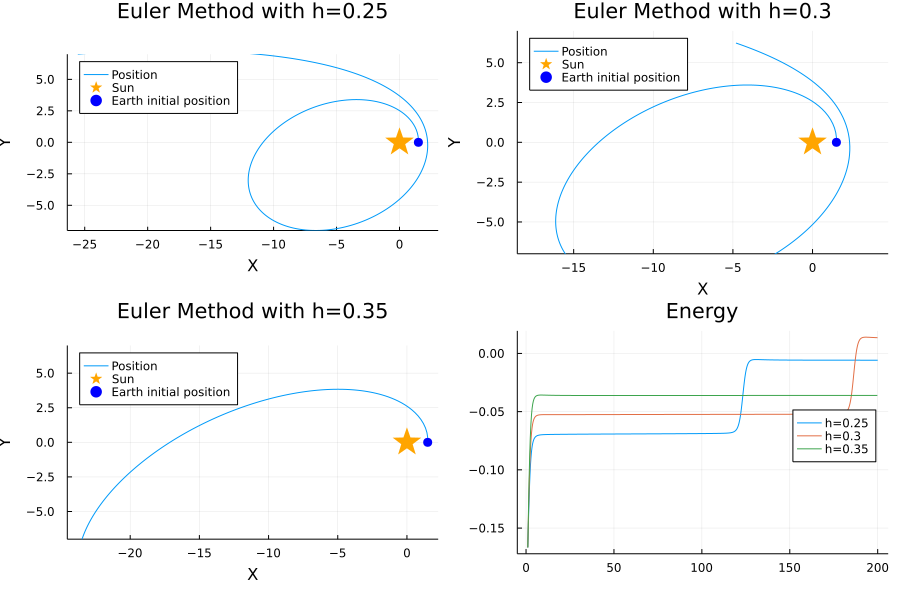

In [23]:
plot_sun_moon_system(eulers_method, [0.25, 0.3, 0.35], 200, [0, 1, 1.5, 0], "Euler Method")

#### 15d:

┌ Info: Saved animation to 
│   fn = c:\Users\isaac\Documents\Uni\MATH2504\Isaac-Beh__Leanna-Salve-2504-2022-BigHW\question_15d.gif
└ @ Plots C:\Users\isaac\.julia\packages\Plots\GGa6i\src\animation.jl:126


Plots.AnimatedGif("c:\\Users\\isaac\\Documents\\Uni\\MATH2504\\Isaac-Beh__Leanna-Salve-2504-2022-BigHW\\question_15d.gif")
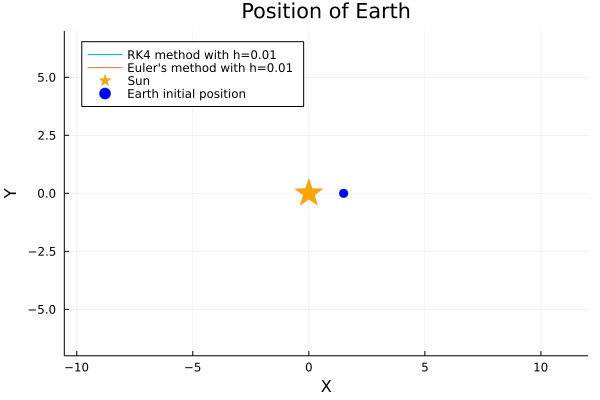

In [22]:
best_state, time = ODE_solve_RK4(df_dt_one_body, 1:0.01:200, [0, 1, 1.5, 0])
worst_state, time = eulers_method(df_dt_one_body, 1:0.01:200, [0, 1, 1.5, 0])
# Note that time will be the same in both cases

p = plot(2, # 2 different trajectories
    xlabel= "X",
    ylabel = "Y",
    title = "Position of Earth",
    aspectratio=1,
    legend=:topleft,
    ylim=(-7,7),
    label=["RK4 method with h=0.01" "Euler's method with h=0.01"])
scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")
scatter!([best_state[3, 1]], [best_state[4, 1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")

animation = @animate for i in 1:length(time)
    push!(p, 1, best_state[3, i], best_state[4, i])
    push!(p, 2, worst_state[3, i], worst_state[4, i])
end every 100
gif(animation, "question_15d.gif")

The file can also be found attached (named `question_15d.gif`).

# Solution to [Question 16](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q16)

#### 16a:

#### 16b:

#### 16c:

#### 16d: